In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats

VERSION = "3.0"
DIR = "/home/julian/Documents/ndnrtc_testing/evaluation/bandwidth_evaluation_" + VERSION + "_results"

# read in csv file
df = pd.read_csv(DIR + '/run_overview.csv', delimiter='\t', index_col=False)

# transform columns names to lower case
df.columns = [col.lower() for col in df]

# ensuring backwards compatibility
df.rename(columns={"adaption":"init._res."}, inplace=True)

# ensuring forwards compatibility
df.rename(columns={"retr._total":"retransmissions"}, inplace=True)

df.head(10)

,setting,run,init._res.,adaption_logic,shaping_profile,bandwith(cons),frames_missing,retr._max,retransmissions,psnr,ssim,vmaf
0,0,0,low,NoAdaption,CONS,20000,4,0,-1,29.00,0.817861,46.987038
1,0,1,low,NoAdaption,CONS,20000,78,0,-1,20.79,0.805251,46.549599
2,0,2,low,NoAdaption,CONS,20000,77,0,-1,20.80,0.805334,46.549598
3,0,3,low,NoAdaption,CONS,20000,3,0,-1,29.00,0.817936,46.987038
4,0,4,low,NoAdaption,CONS,20000,0,0,-1,29.00,0.818083,47.187381
5,0,5,low,NoAdaption,CONS,20000,78,0,-1,20.79,0.805251,46.549599
6,0,6,low,NoAdaption,CONS,20000,78,0,-1,20.79,0.805251,46.549599
7,0,7,low,NoAdaption,CONS,20000,4,0,-1,29.00,0.817861,46.987038
8,0,8,low,NoAdaption,CONS,20000,3,0,-1,29.00,0.817936,46.987038
9,1,0,low,NoAdaption,CONS,19000,82,0,-1,20.78,0.804920,46.549598


In [2]:
# get list of setting numbers without duplicates
settingNumbers = df["setting"].unique()
# create empty list
list_tmp = []

for setting in settingNumbers:
    # get all runs within a setting
    group = df[df["setting"] == setting]
    
    # get last line of that group as DataFrame
    part1 = pd.DataFrame(group[-1:])
    # cut off last few columns and reset index to 0
    part1 = part1[part1.columns[:-6]].reset_index().drop("index", axis = 1)
    
    # calculate mean values for group, transpose and cut off first few columns   
    part2 = pd.DataFrame(group.mean()["frames_missing":"vmaf"]).T
    # add suffix to column names
    for col in part2.columns:
        part2.rename(columns={col:col+"_mean"}, inplace=True)
    
    # calculate std deviation values for group, transpose and cut off first few columns   
    part3 = pd.DataFrame(group.std()["frames_missing":"vmaf"]).T
    # add suffix to column names
    for col in part3.columns:
        part3.rename(columns={col:col+"_std"}, inplace=True)
        
    # put parts together and store row in list
    list_tmp.append(pd.concat([part1, part2, part3], axis=1, ignore_index=False))

# concatenate all rows in list into a DataFrame
df_c = pd.concat(list_tmp, axis=0, ignore_index=True, sort=False)
df_c.sort_values(by=['init._res.', 'bandwith(cons)'], ascending=False, inplace=True)
df_c.head(15)

,setting,run,init._res.,adaption_logic,shaping_profile,bandwith(cons),frames_missing_mean,retr._max_mean,retransmissions_mean,psnr_mean,ssim_mean,vmaf_mean,frames_missing_std,retr._max_std,retransmissions_std,psnr_std,ssim_std,vmaf_std
20,20,8,med,NoAdaption,CONS,20000,35.222222,0.222222,-0.666667,27.767778,0.918883,46.747711,39.641449,0.666667,1.0,6.252087,0.007344,0.393319
21,21,8,med,NoAdaption,CONS,19000,52.000000,0.000000,-1.000000,25.131111,0.915781,46.581818,38.032881,0.000000,0.0,5.931668,0.006984,0.373176
22,22,8,med,NoAdaption,CONS,18000,26.777778,0.000000,-1.000000,29.085556,0.920426,46.830572,38.222303,0.000000,0.0,5.931667,0.006992,0.373222
23,23,8,med,NoAdaption,CONS,17000,44.000000,0.000000,-1.000000,26.450000,0.917329,46.664792,38.671695,0.000000,0.0,6.251824,0.007311,0.393319
24,24,8,med,NoAdaption,CONS,16000,26.888889,0.000000,-1.000000,29.085556,0.920423,46.830630,37.106079,0.000000,0.0,5.931667,0.006949,0.373136
25,25,8,med,NoAdaption,CONS,15000,52.222222,0.000000,-1.000000,25.133333,0.915787,46.581873,36.931618,0.000000,0.0,5.930000,0.006932,0.373136
26,26,8,med,NoAdaption,CONS,14000,18.333333,0.000000,-1.000000,30.404444,0.921979,46.913549,33.301652,0.000000,0.0,5.229768,0.006139,0.329075
27,27,8,med,NoAdaption,CONS,13000,34.888889,0.000000,-1.000000,27.767778,0.918894,46.747711,39.734885,0.000000,0.0,6.252087,0.007345,0.393319
28,28,8,med,NoAdaption,CONS,12000,36.111111,0.000000,-1.000000,27.766667,0.918863,46.747711,39.775760,0.000000,0.0,6.253405,0.007345,0.393319
29,29,8,med,NoAdaption,CONS,11000,43.000000,0.000000,-1.000000,26.451111,0.917355,46.664792,39.382737,0.000000,0.0,6.250769,0.007323,0.393319


In [3]:
def plotBandwidth (label):
    
    bandwidth_low = df_c[df_c["init._res."] == "low"]["bandwith(cons)"]
    bandwidth_med = df_c[df_c["init._res."] == "med"]["bandwith(cons)"]
    bandwidth_high = df_c[df_c["init._res."] == "high"]["bandwith(cons)"]

    mean_low = df_c[df_c["init._res."] == "low"][label + "_mean"]
    mean_med = df_c[df_c["init._res."] == "med"][label + "_mean"]
    mean_high = df_c[df_c["init._res."] == "high"][label + "_mean"]
    
    std_low = df_c[df_c["init._res."] == "low"][label + "_std"]
    std_med = df_c[df_c["init._res."] == "med"][label + "_std"]
    std_high = df_c[df_c["init._res."] == "high"][label + "_std"]
    
    xaxis_step = 1000
    if len(df["bandwith(cons)"].unique()) > 20 :
           xaxis_step = 2000
    
    plt.errorbar(bandwidth_low, mean_low, std_low, color="blue", marker="s", markerSize=4, elinewidth=1, capsize=2, label='low')
    plt.errorbar(bandwidth_med, mean_med, std_med, color="orange", marker="v", markerSize=4, elinewidth=1, capsize=2, label='med')
    plt.errorbar(bandwidth_high, mean_high, std_high, color="red", marker="o", markerSize=4, elinewidth=1, capsize=2, label='high')
    plt.title(label.upper())
    plt.xlabel("bandwidth [bit/s]")
    plt.ylabel(label)
    plt.gca().invert_xaxis()
    plt.xticks(np.arange(df["bandwith(cons)"].min(), df["bandwith(cons)"].max()+1000, step=xaxis_step), rotation=70)
    if VERSION == "3.0":
        plt.axvline(x=3000, color="blue", linewidth=0.1)
        plt.axvline(x=4000, color="orange", linewidth=0.1)
        plt.axvline(x=10000, color="red", linewidth=0.1)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(DIR + "/bandwidth_" + label + ".pdf")

graph1 = plt.subplot(511)
plotBandwidth("psnr")
plt.setp(graph1.get_xticklabels(), visible=False)
plt.xlabel("")

graph2 = plt.subplot(512)
plotBandwidth("ssim")
plt.setp(graph2.get_xticklabels(), visible=False)
plt.xlabel("")

graph3 = plt.subplot(513)
plotBandwidth("vmaf")
plt.setp(graph3.get_xticklabels(), visible=False)
plt.xlabel("")

graph4 = plt.subplot(514)
plotBandwidth("frames_missing")
plt.setp(graph4.get_xticklabels(), visible=False)
plt.xlabel("")

graph5 = plt.subplot(515)
plotBandwidth("retransmissions")
plt.setp(graph5.get_xticklabels(), visible=True)

plt.savefig(DIR + "/bandwidth_combined.pdf")
plt.show()

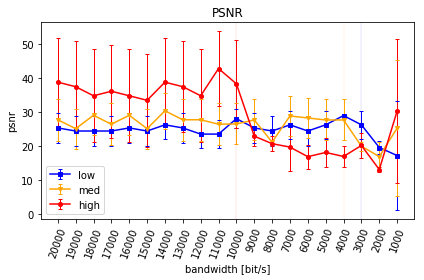

In [4]:
plotBandwidth("psnr")

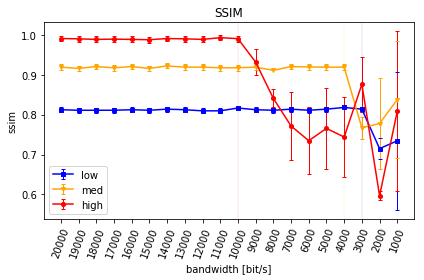

In [5]:
plotBandwidth("ssim")

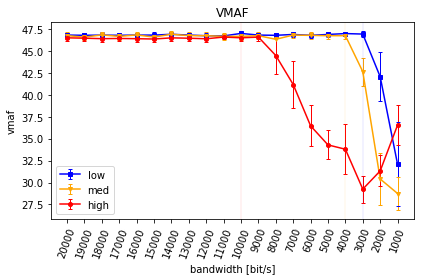

In [6]:
plotBandwidth("vmaf")

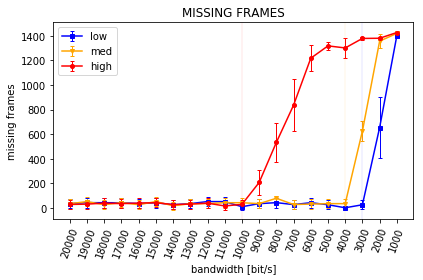

In [7]:
label = "frames_missing"
plotBandwidth(label)
plt.title("MISSING FRAMES")
plt.ylabel("missing frames")
plt.savefig(DIR + "/bandwidth_" + label + ".pdf")

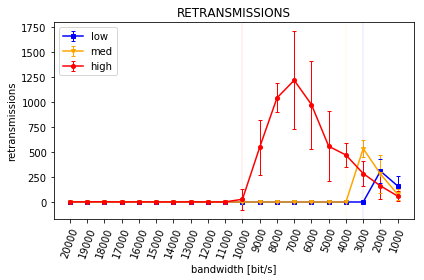

In [8]:
plotBandwidth("retransmissions")

In [9]:
df_c.to_csv(DIR + "/run_overview_means_pandas.csv")